In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import os
import warnings
warnings.filterwarnings('ignore')
os.environ["PYTHONWARNINGS"] = "ignore"

In [3]:
cur_folder_name = os.getcwd().split('/')[-1]
if cur_folder_name != "fairness-variance":
    os.chdir("../../..")

print('Current location: ', os.getcwd())

Current location:  /Users/denys_herasymuk/UCU/4course_2term/Bachelor_Thesis/Code/fairness-variance


# Visualizations

In [4]:
from virny.utils.custom_initializers import create_models_metrics_dct_from_database_df

from source.utils.db_functions import read_model_metric_dfs_from_db
from source.custom_classes.experiments_composer import ExperimentsComposer
from source.visualizations import preprocess_metrics, create_group_base_and_fair_models_box_plot, \
    create_scatter_plot, create_group_models_box_plot_per_test_set, create_bar_plot_for_model_selection

pip install 'aif360[LawSchoolGPA]'
pip install 'aif360[AdversarialDebiasing]'
pip install 'aif360[AdversarialDebiasing]'


## Initialize Configs

In [5]:
EXPERIMENT_NAME = 'out_of_domain_uncertainty_rich_income_test'
DB_COLLECTION_NAME = 'out_of_domain_uncertainty'
DATASET_NAME = 'Folktables_2018_Income'
EXPERIMENT_SESSION_UUID = 'b502586e-0513-405e-acf5-420e363abfe6'
SENSITIVE_ATTRS = ['SEX', 'RAC1P', 'SEX&RAC1P']
MODEL_NAMES = ['RandomForestClassifier']

In [6]:
from source.utils.db_functions import connect_to_mongodb

client, collection_obj, db_writer_func = connect_to_mongodb(DB_COLLECTION_NAME)

## Group Metrics Composition

In [7]:
model_metric_dfs = read_model_metric_dfs_from_db(collection_obj, EXPERIMENT_SESSION_UUID)
models_metrics_dct = create_models_metrics_dct_from_database_df(model_metric_dfs)
client.close()

In [8]:
models_metrics_dct[list(models_metrics_dct.keys())[0]].shape

(38, 33)

In [9]:
models_metrics_dct[list(models_metrics_dct.keys())[0]][
    models_metrics_dct[list(models_metrics_dct.keys())[0]]['Experiment_Iteration'] == 'Exp_iter_1'
].head(20)

,Metric,Model_Name,Model_Params,Dataset_Name,Num_Estimators,Test_Set_Index,Tag,Record_Create_Date_Time,Session_Uuid,Experiment_Iteration,...,SEX&RAC1P_priv,SEX&RAC1P_priv_correct,SEX&RAC1P_priv_incorrect,SEX_dis,SEX_dis_correct,SEX_dis_incorrect,SEX_priv,SEX_priv_correct,SEX_priv_incorrect,overall
0,Accuracy,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,200,0,OK,2023-10-29 06:08:22.268,b502586e-0513-405e-acf5-420e363abfe6,Exp_iter_1,...,0.815024,1.000000,0.000000,0.817478,1.000000,0.000000,0.813396,1.000000,0.000000,0.815400
1,Accuracy,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,200,1,OK,2023-10-29 06:08:22.444,b502586e-0513-405e-acf5-420e363abfe6,Exp_iter_1,...,0.775234,1.000000,0.000000,0.800000,1.000000,0.000000,0.760976,1.000000,0.000000,0.780000
2,Aleatoric_Uncertainty,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,200,0,OK,2023-10-29 06:08:22.268,b502586e-0513-405e-acf5-420e363abfe6,Exp_iter_1,...,0.630587,0.580384,0.851790,0.629414,0.581942,0.842033,0.624775,0.573589,0.847895,0.627052
3,Aleatoric_Uncertainty,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,200,1,OK,2023-10-29 06:08:22.444,b502586e-0513-405e-acf5-420e363abfe6,Exp_iter_1,...,0.678145,0.627135,0.854079,0.662956,0.617537,0.844634,0.686064,0.632373,0.856998,0.674799
4,F1,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,200,0,OK,2023-10-29 06:08:22.268,b502586e-0513-405e-acf5-420e363abfe6,Exp_iter_1,...,0.814489,1.000000,0.000000,0.787072,1.000000,0.000000,0.824917,1.000000,0.000000,0.808387
5,F1,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,200,1,OK,2023-10-29 06:08:22.444,b502586e-0513-405e-acf5-420e363abfe6,Exp_iter_1,...,0.670306,1.000000,0.000000,0.611399,1.000000,0.000000,0.693367,1.000000,0.000000,0.661747
6,FNR,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,200,0,OK,2023-10-29 06:08:22.268,b502586e-0513-405e-acf5-420e363abfe6,Exp_iter_1,...,0.185417,0.000000,1.000000,0.198839,0.000000,1.000000,0.180220,0.000000,1.000000,0.188243
7,FNR,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,200,1,OK,2023-10-29 06:08:22.444,b502586e-0513-405e-acf5-420e363abfe6,Exp_iter_1,...,0.285109,0.000000,1.000000,0.259653,0.000000,1.000000,0.294807,0.000000,1.000000,0.282667
8,FPR,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,200,0,OK,2023-10-29 06:08:22.268,b502586e-0513-405e-acf5-420e363abfe6,Exp_iter_1,...,0.184538,0.000000,1.000000,0.170654,0.000000,1.000000,0.193986,0.000000,1.000000,0.181242
9,FPR,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,200,1,OK,2023-10-29 06:08:22.444,b502586e-0513-405e-acf5-420e363abfe6,Exp_iter_1,...,0.196420,0.000000,1.000000,0.183902,0.000000,1.000000,0.204366,0.000000,1.000000,0.193143


In [10]:
exp_composer = ExperimentsComposer(models_metrics_dct, SENSITIVE_ATTRS)
exp_subgroup_metrics_dct = exp_composer.create_exp_subgroup_metrics_dct_for_mult_test_sets()

In [11]:
exp_subgroup_metrics_dct['RandomForestClassifier']['Exp_iter_1'][0.7][0].head(20)

,Metric,Model_Name,Model_Params,Dataset_Name,Num_Estimators,Test_Set_Index,Tag,Record_Create_Date_Time,Session_Uuid,Experiment_Iteration,...,SEX&RAC1P_priv,SEX&RAC1P_priv_correct,SEX&RAC1P_priv_incorrect,SEX_dis,SEX_dis_correct,SEX_dis_incorrect,SEX_priv,SEX_priv_correct,SEX_priv_incorrect,overall
0,Accuracy,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,200,0,OK,2023-10-29 06:08:22.268,b502586e-0513-405e-acf5-420e363abfe6,Exp_iter_1,...,0.815024,1.000000,0.000000,0.817478,1.000000,0.000000,0.813396,1.000000,0.000000,0.815400
2,Aleatoric_Uncertainty,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,200,0,OK,2023-10-29 06:08:22.268,b502586e-0513-405e-acf5-420e363abfe6,Exp_iter_1,...,0.630587,0.580384,0.851790,0.629414,0.581942,0.842033,0.624775,0.573589,0.847895,0.627052
4,F1,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,200,0,OK,2023-10-29 06:08:22.268,b502586e-0513-405e-acf5-420e363abfe6,Exp_iter_1,...,0.814489,1.000000,0.000000,0.787072,1.000000,0.000000,0.824917,1.000000,0.000000,0.808387
6,FNR,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,200,0,OK,2023-10-29 06:08:22.268,b502586e-0513-405e-acf5-420e363abfe6,Exp_iter_1,...,0.185417,0.000000,1.000000,0.198839,0.000000,1.000000,0.180220,0.000000,1.000000,0.188243
8,FPR,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,200,0,OK,2023-10-29 06:08:22.268,b502586e-0513-405e-acf5-420e363abfe6,Exp_iter_1,...,0.184538,0.000000,1.000000,0.170654,0.000000,1.000000,0.193986,0.000000,1.000000,0.181242
10,IQR,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,200,0,OK,2023-10-29 06:08:22.268,b502586e-0513-405e-acf5-420e363abfe6,Exp_iter_1,...,0.062304,0.056927,0.085998,0.061455,0.056444,0.083895,0.062300,0.056793,0.086303,0.061885
12,Jitter,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,200,0,OK,2023-10-29 06:08:22.268,b502586e-0513-405e-acf5-420e363abfe6,Exp_iter_1,...,0.062426,0.043066,0.147729,0.061465,0.042695,0.145536,0.060182,0.041337,0.142328,0.060812
14,Label_Stability,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,200,0,OK,2023-10-29 06:08:22.268,b502586e-0513-405e-acf5-420e363abfe6,Exp_iter_1,...,0.911465,0.939578,0.787598,0.913316,0.940302,0.792455,0.914372,0.941927,0.794263,0.913854
16,Mean,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,200,0,OK,2023-10-29 06:08:22.268,b502586e-0513-405e-acf5-420e363abfe6,Exp_iter_1,...,0.509403,0.514269,0.487963,0.554402,0.571814,0.476417,0.488029,0.486767,0.493529,0.520611
18,Overall_Uncertainty,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,200,0,OK,2023-10-29 06:08:22.268,b502586e-0513-405e-acf5-420e363abfe6,Exp_iter_1,...,0.641605,0.590611,0.866290,0.640167,0.591956,0.856095,0.635924,0.583935,0.862542,0.638007


In [12]:
exp_group_metrics_dct = exp_composer.compose_group_metrics_for_mult_test_sets(exp_subgroup_metrics_dct)

In [13]:
exp_group_metrics_dct['RandomForestClassifier']['Exp_iter_1'][0.7][0].head(20)

,Metric,SEX,RAC1P,SEX&RAC1P,Model_Name,Experiment_Iteration,Intervention_Param,Test_Set_Index
0,Equalized_Odds_TPR,-0.018619,-0.028815,-0.028420,RandomForestClassifier,Exp_iter_1,0.7,0
1,Equalized_Odds_FPR,-0.023331,-0.020890,-0.020010,RandomForestClassifier,Exp_iter_1,0.7,0
2,Equalized_Odds_FNR,0.018619,0.028815,0.028420,RandomForestClassifier,Exp_iter_1,0.7,0
3,Disparate_Impact,1.048863,1.068803,1.081511,RandomForestClassifier,Exp_iter_1,0.7,0
4,Statistical_Parity_Difference,0.048255,0.068405,0.081530,RandomForestClassifier,Exp_iter_1,0.7,0
5,Accuracy_Parity,0.004082,0.001318,0.002817,RandomForestClassifier,Exp_iter_1,0.7,0
6,Label_Stability_Ratio,0.998845,1.013968,1.019644,RandomForestClassifier,Exp_iter_1,0.7,0
7,IQR_Parity,-0.000846,-0.002467,-0.003143,RandomForestClassifier,Exp_iter_1,0.7,0
8,Std_Parity,-0.000428,-0.001863,-0.002224,RandomForestClassifier,Exp_iter_1,0.7,0
9,Std_Ratio,0.990489,0.958871,0.950695,RandomForestClassifier,Exp_iter_1,0.7,0


In [14]:
exp_group_metrics_dct['RandomForestClassifier']['Exp_iter_1'][0.7][0].head()

,Metric,SEX,RAC1P,SEX&RAC1P,Model_Name,Experiment_Iteration,Intervention_Param,Test_Set_Index
0,Equalized_Odds_TPR,-0.018619,-0.028815,-0.028420,RandomForestClassifier,Exp_iter_1,0.7,0
1,Equalized_Odds_FPR,-0.023331,-0.020890,-0.020010,RandomForestClassifier,Exp_iter_1,0.7,0
2,Equalized_Odds_FNR,0.018619,0.028815,0.028420,RandomForestClassifier,Exp_iter_1,0.7,0
3,Disparate_Impact,1.048863,1.068803,1.081511,RandomForestClassifier,Exp_iter_1,0.7,0
4,Statistical_Parity_Difference,0.048255,0.068405,0.081530,RandomForestClassifier,Exp_iter_1,0.7,0


## Figure 1. Subgroup boxplots.

In [15]:
melted_all_subgroup_metrics_per_model_dct, melted_all_group_metrics_per_model_dct = \
    preprocess_metrics(exp_subgroup_metrics_dct, exp_group_metrics_dct)

In [16]:
vals_to_replace = {
    'Model_Name': {
        'LGBMClassifier': 'LGBM',
        'LogisticRegression': 'LR',
        'RandomForestClassifier': 'RF',
        'MLPClassifier': 'MLP'
    }
}

<Figure size 1200x600 with 0 Axes>

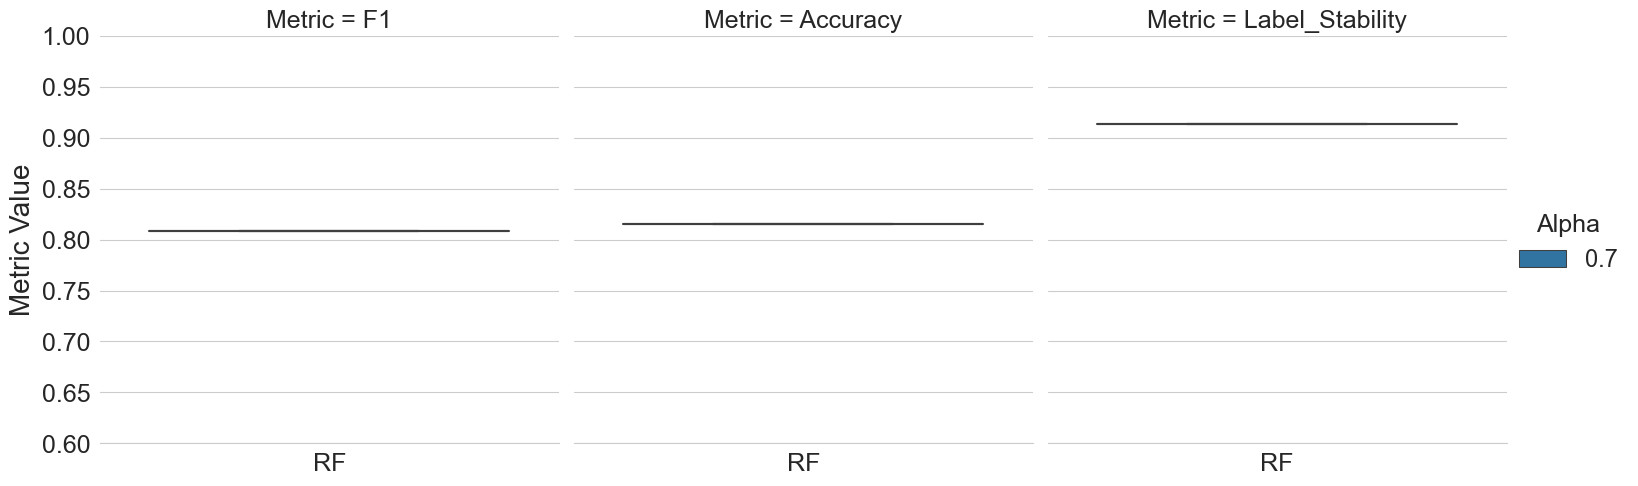

In [17]:
create_group_base_and_fair_models_box_plot(melted_all_subgroup_metrics_per_model_dct,
                                           ylim=(0.6, 1.0),
                                           metric_names=['F1', 'Accuracy', 'Label_Stability'],
                                           vals_to_replace=vals_to_replace)

<Figure size 1200x600 with 0 Axes>

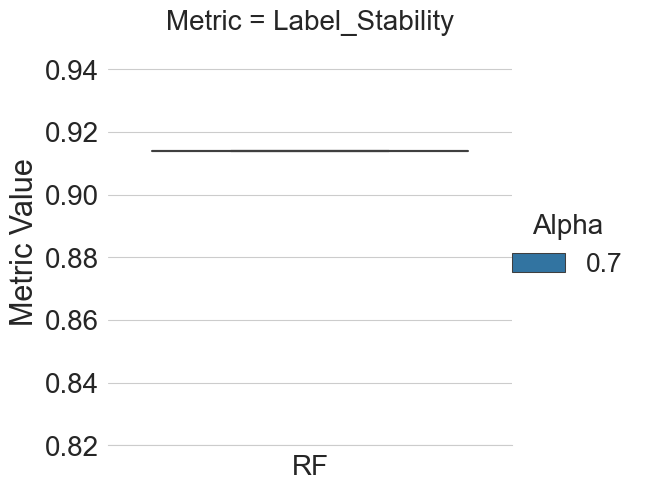

In [18]:
create_group_base_and_fair_models_box_plot(melted_all_subgroup_metrics_per_model_dct,
                                           ylim=(0.82, 0.95),
                                           metric_names=['Label_Stability'],
                                           vals_to_replace=vals_to_replace)

## Figure 2. Create group boxplots.

<Figure size 1200x600 with 0 Axes>

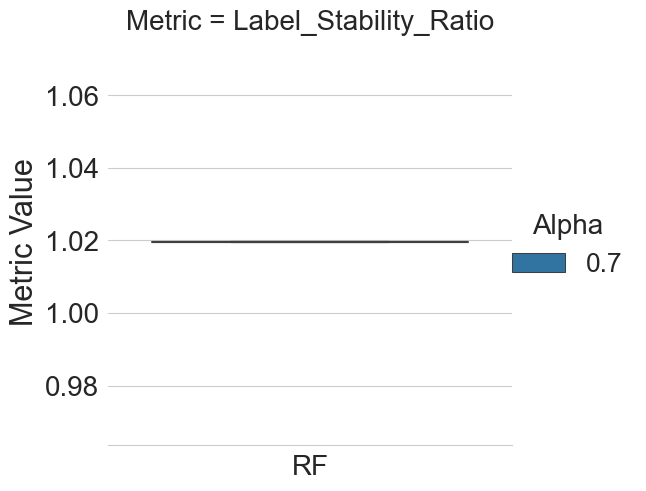

In [19]:
create_group_base_and_fair_models_box_plot(melted_all_group_metrics_per_model_dct,
                                           group='SEX&RAC1P',
                                           metric_names=['Label_Stability_Ratio'],
                                           vals_to_replace=vals_to_replace)

<Figure size 1200x600 with 0 Axes>

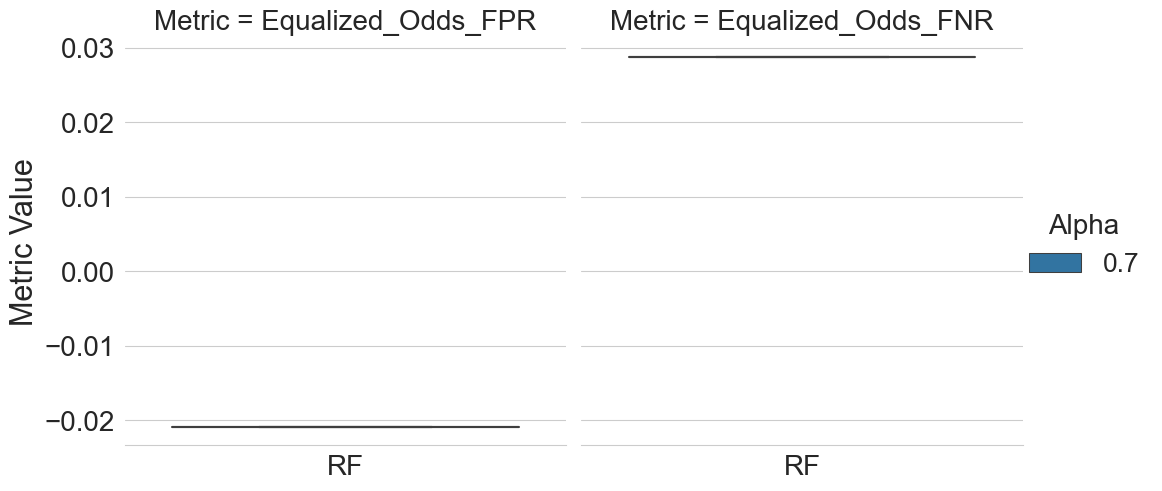

In [20]:
create_group_base_and_fair_models_box_plot(melted_all_group_metrics_per_model_dct,
                                           group='RAC1P',
                                           metric_names=['Equalized_Odds_FPR', 'Equalized_Odds_FNR'],
                                           vals_to_replace=vals_to_replace)

## Figure 5. Out-of-domain boxplots.

In [21]:
new_vals_to_replace = vals_to_replace
new_vals_to_replace['Test_Set_Index'] = {
    0: 'Rich set',
    1: 'Poor set',
}

<Figure size 1200x600 with 0 Axes>

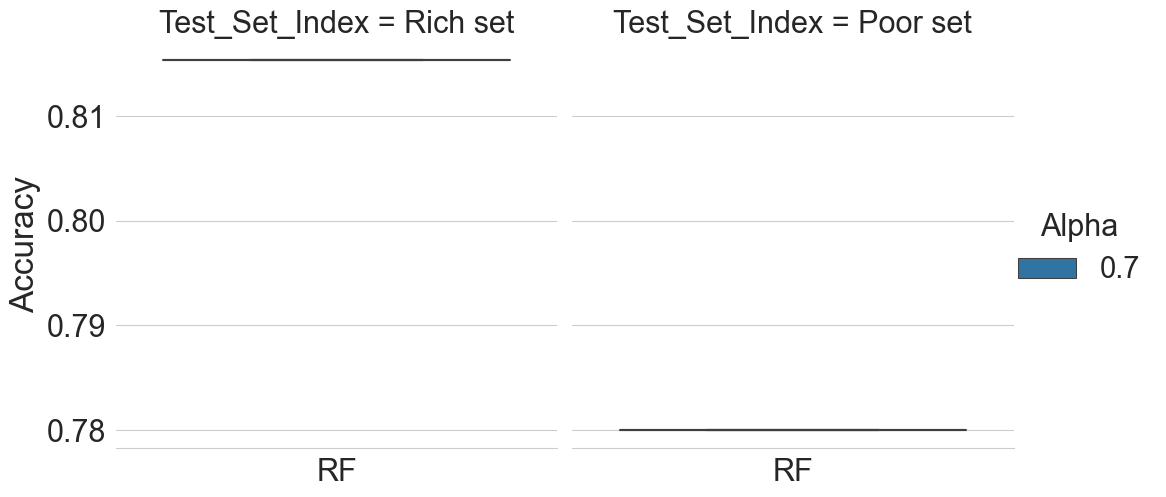

In [22]:
create_group_models_box_plot_per_test_set(melted_all_subgroup_metrics_per_model_dct, metric_name='Accuracy',
                                          vals_to_replace=new_vals_to_replace)

<Figure size 1200x600 with 0 Axes>

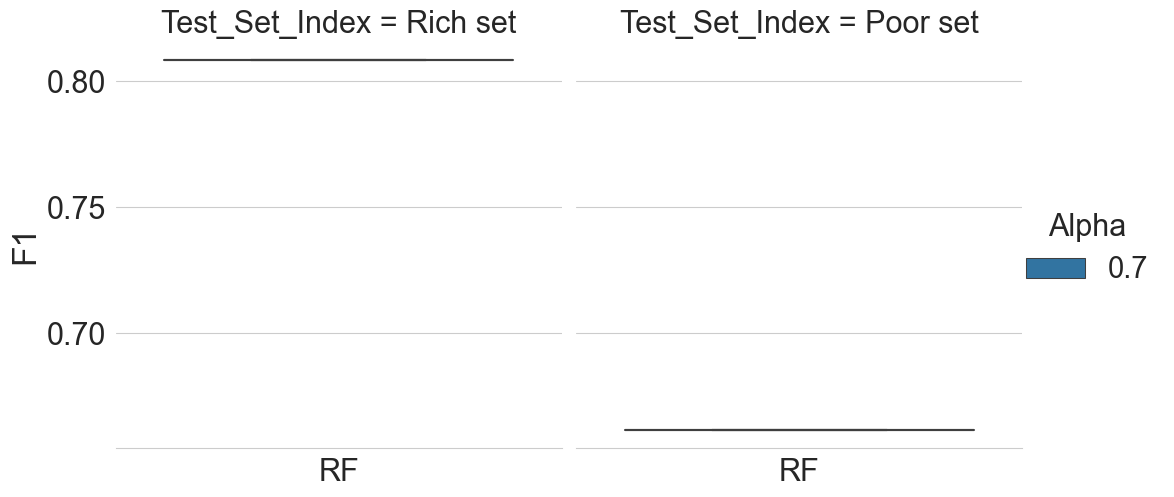

In [23]:
create_group_models_box_plot_per_test_set(melted_all_subgroup_metrics_per_model_dct, metric_name='F1',
                                          vals_to_replace=new_vals_to_replace)

<Figure size 1200x600 with 0 Axes>

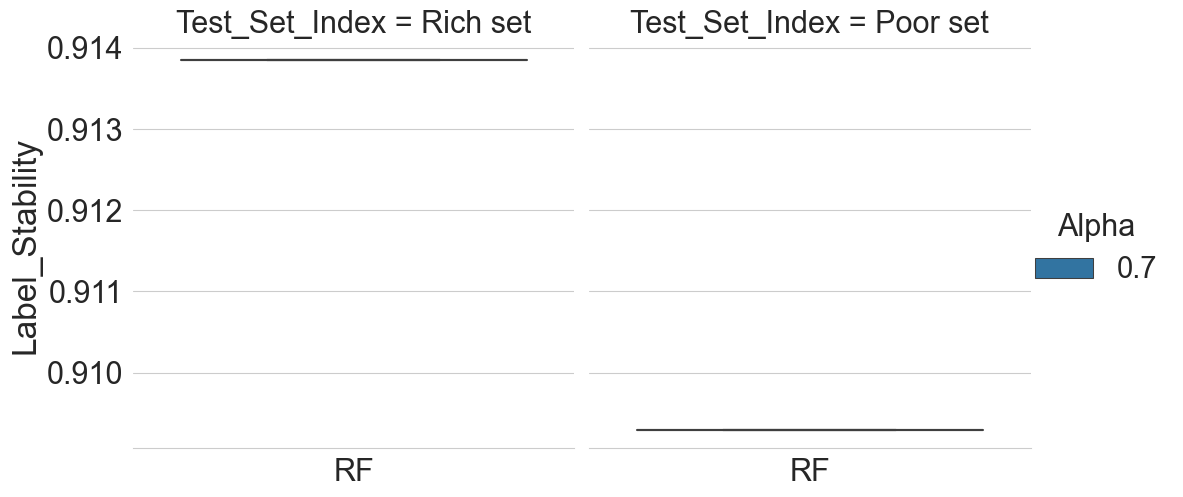

In [24]:
create_group_models_box_plot_per_test_set(melted_all_subgroup_metrics_per_model_dct, metric_name='Label_Stability',
                                          vals_to_replace=new_vals_to_replace)

<Figure size 1200x600 with 0 Axes>

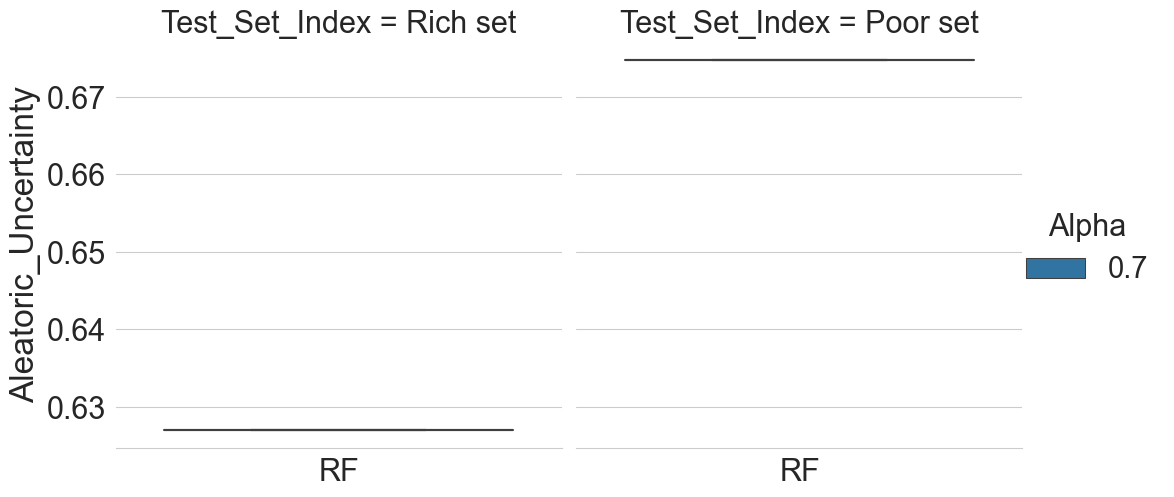

In [25]:
create_group_models_box_plot_per_test_set(melted_all_subgroup_metrics_per_model_dct, metric_name='Aleatoric_Uncertainty',
                                          vals_to_replace=new_vals_to_replace)

<Figure size 1200x600 with 0 Axes>

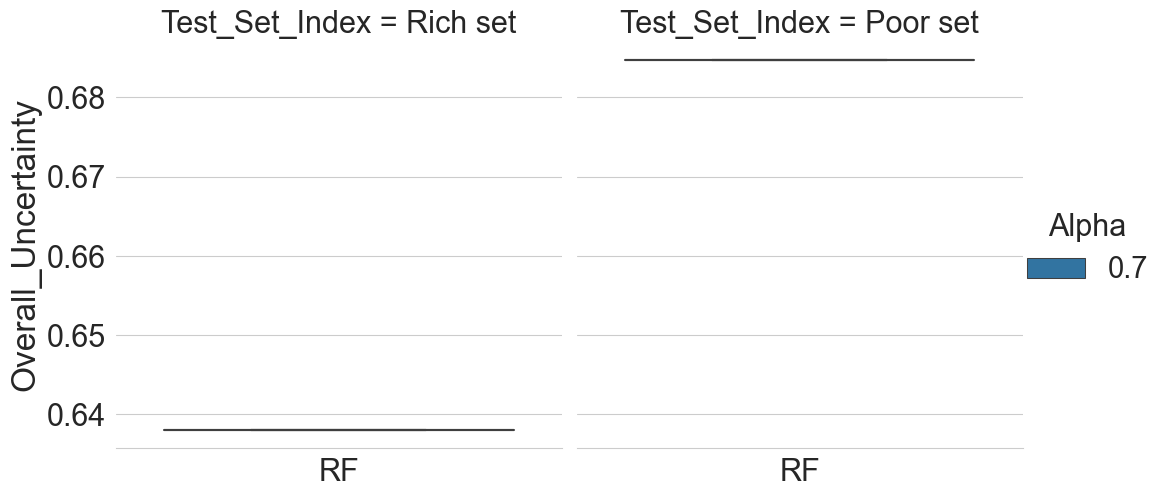

In [26]:
create_group_models_box_plot_per_test_set(melted_all_subgroup_metrics_per_model_dct, metric_name='Overall_Uncertainty',
                                          vals_to_replace=new_vals_to_replace)

<Figure size 1200x600 with 0 Axes>

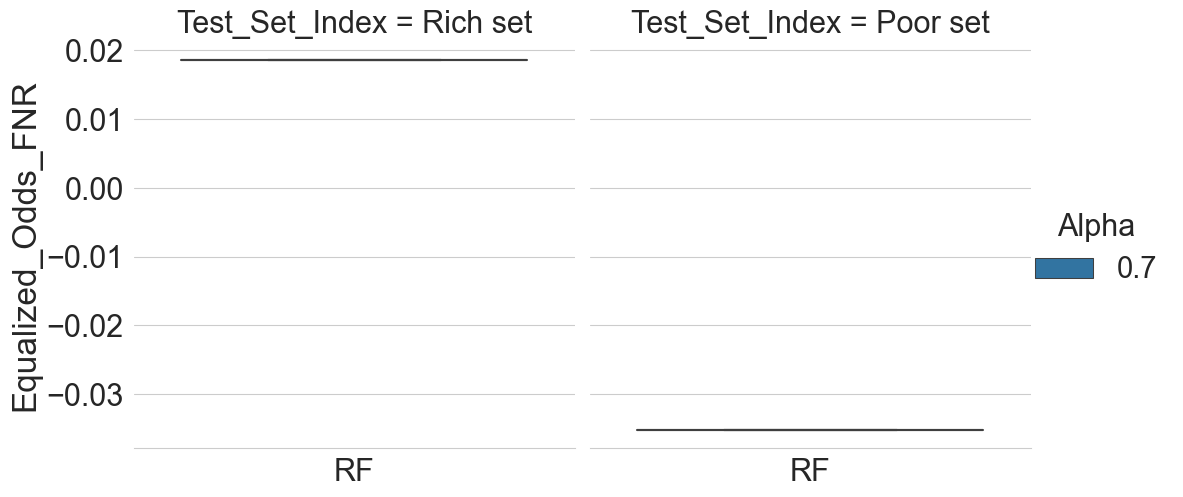

In [27]:
create_group_models_box_plot_per_test_set(melted_all_group_metrics_per_model_dct, metric_name='Equalized_Odds_FNR', group='SEX',
                                          vals_to_replace=new_vals_to_replace)

<Figure size 1200x600 with 0 Axes>

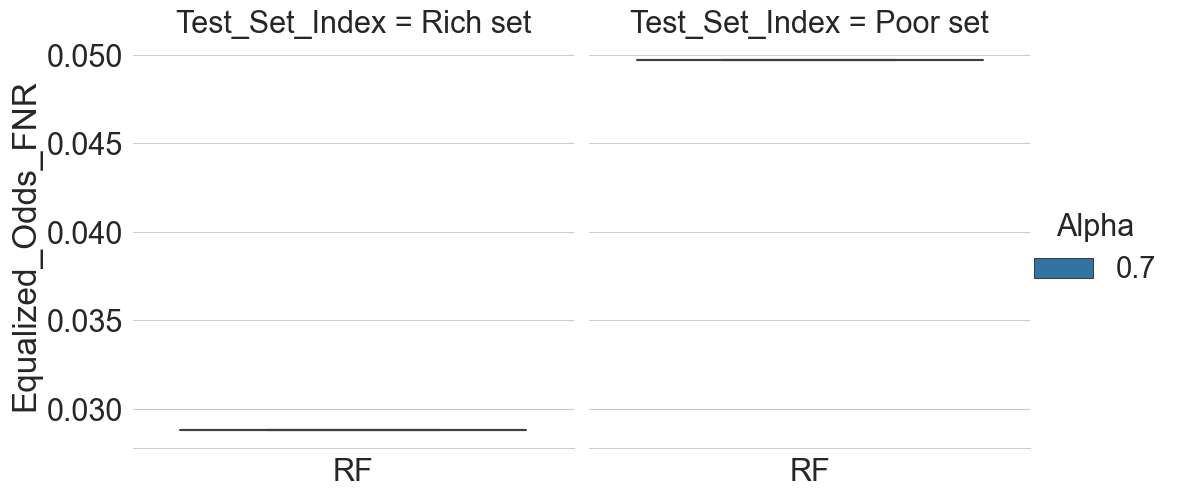

In [28]:
create_group_models_box_plot_per_test_set(melted_all_group_metrics_per_model_dct, metric_name='Equalized_Odds_FNR', group='RAC1P',
                                          vals_to_replace=new_vals_to_replace)

<Figure size 1200x600 with 0 Axes>

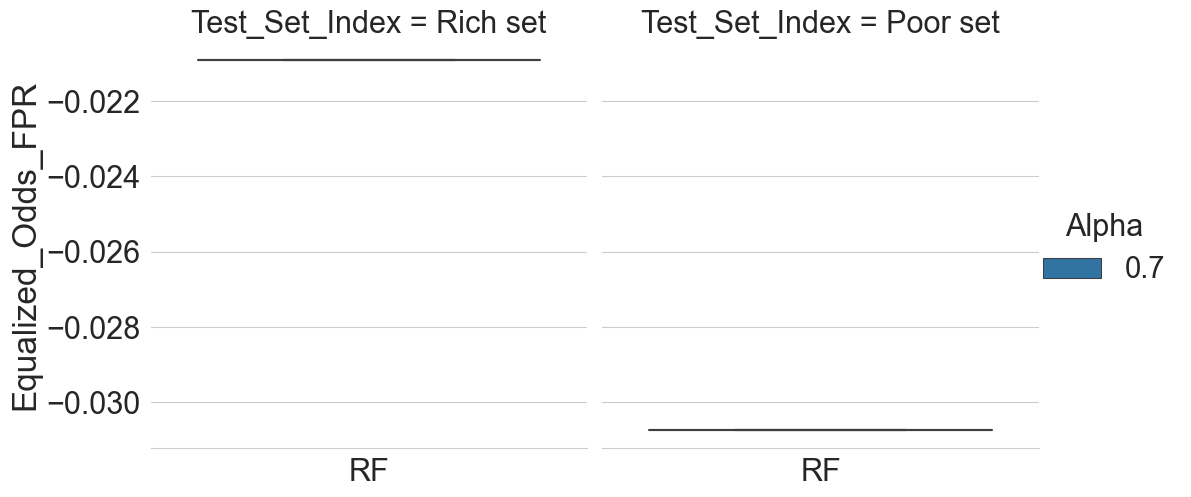

In [29]:
create_group_models_box_plot_per_test_set(melted_all_group_metrics_per_model_dct, metric_name='Equalized_Odds_FPR', group='RAC1P',
                                          vals_to_replace=new_vals_to_replace)

<Figure size 1200x600 with 0 Axes>

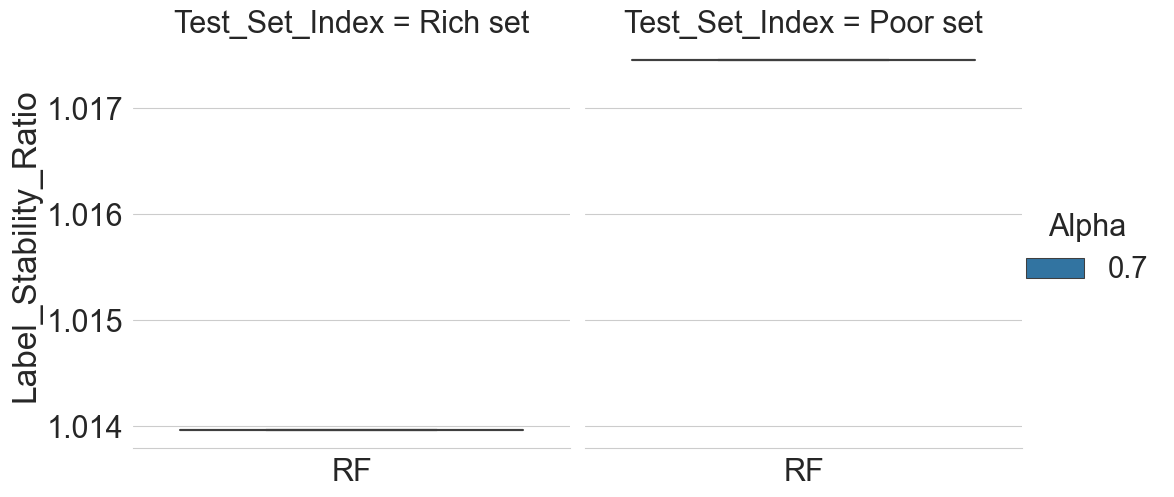

In [30]:
create_group_models_box_plot_per_test_set(melted_all_group_metrics_per_model_dct, metric_name='Label_Stability_Ratio', group='RAC1P',
                                          vals_to_replace=new_vals_to_replace)